# Laporan Proyek Machine Learning
### Nama :  Fauzan Fadhillah Arisandi
### Nim :   211351055
### Kelas : Pagi B

## Domain Proyek

Memprediksi harga laptop merupakan upaya yang krusial dan signifikan.Semakin kesini laptop menjadi sering digunakan karena laptop mudah di bawa kemana-mana , tidak seperti komputer.Maka dari itu banyak yang menginginkan untuk mempunyai laptop tetapi sebagian besar berkeinginan untuk memiliki spek laptop yang bagus tetapi tidak bisa memprediksi harganya.Bagian yang penting dari sebuah laptop biasanya merek dan model, RAM, ROM, GPU, CPU, dan sebagainya. Beberapa perusahaan laptop berkinginan untuk membandingkan harga brand nya dengan brand yang lain , untuk mengetahui harga yang dapat dijangkau oleh pembeli sehingga memiliki peluang besar pembeli membeli brand nya.

## Business Understanding
Dikarnakan laptop itu praktis , mudah di bawa kemana-mana, dan banyak yang menginginkan nya.Maka di butuhkan penelitian yang dapat memprediksi harga laptop , yang sesuai dengan spesifikasi laptop yang pembeli inginkan sehingga pembeli memiliki gambaran pada modal harga laptop yang di inginkan. Perusahaan membutuhkan wawasan pada harga laptop brand lain, supaya dapat membandingkan harga laptop brand nya dengan yang lain sehingga dapat mengetahui harga yang terjangkau untuk pembeli.

### Problem Statements

Menjelaskan pernyataan masalah latar belakang:
- Pembeli tidak dapat memprediksi harga dengan spek laptop yang di inginkan
- Perusahaan tidak dapat mengetahui harga laptop brand lain

### Goals

Menjelaskan tujuan dari pernyataan masalah:
- Membuat penelitian untuk dapat memprediksi harga laptop yang dinginkan pembeli
- Mendapatkan wawasan pada harga laptop brand lain


## Data Understanding
[Laptop Prices Dataset][https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset/data)


Mengimpor Library yang dibutuhkan yakni matplotlib , seaborn ,pandas dan numpy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

membaca data csv

In [ ]:
df = pd.read_csv('laptopPrices/laptopPrice.csv')
df.head()

Memeriksa berapa baris dan kolom

In [ ]:

df.shape

memeriksa apakah ada nilai null/NaN pada dataset

In [ ]:

df.isna().sum()

Mengetahui deskripsi pada data

In [ ]:

df.describe()

In [ ]:
df.info()

Menemukan duplikasi baris,lalu di hilangkan , lalu menunjukan hasil setelah di hilangkan/di drop

In [ ]:

df.duplicated().sum()

df= df.drop_duplicates()

df.shape

### Variabel-variabel pada Laptop Prices Dataset adalah sebagai berikut:
- brand             : Merupakan merek laptop [Contoh: Asus,Lenovo]
- processor_brand   : Merupakan merek processor [Contoh: Intel,AMD]
- processor_name    : Merupakan nama processor [Contoh: Core i3, Celeron Dual]
- processor_gnrtn   : Merupakan generasi processor [Contoh: 10th,11th]
- ram_gb            : Merupakan kapasitas memori jangka pendek [Contoh: 4 GB, 8 GB]
- ram _type         : Merupakan tipe ram [Contoh: DDR4,LPDDR4X]
- ssd               : Merupakan perangkat untuk menyimpan data yang dapat membaca dan menulis data hingga 550 MB/s[Contoh: 512 GB, 1024 GB]
- hdd               : Merupakan perangkat untuk menyimpan data yang dapat membaca dan menulis data hingga kecepatan rata-rata 60 MB/s [Contoh: 1024 GB]
- os                : Merupakan sistem operasi untuk mengelola memori komputer dan proses-proses yang berjalan di komputer [Contoh: Windows]
- os_bit            : Merupakan satuan data sistem operasi [contoh: 32-bit, 64-bit]
- graphic_card_gb   : Merupakan kapasitas kartu grafis [Contoh: 2 GB, 4 GB]
- weight            : Merupakan berat laptop [Contoh: Casual]
- warranty          : Merupakan garansi pada laptop [Contoh: 1 year , 2 years]
- Touchscreen       : Merupakan tipe laptop dengan layar sentuh [Contoh: Yes, No]
- msoffice          : Merupakan microsoft office pada laptop yang tujuannya meliputi mengolah data [Contoh: Yes,No]
- Price             : Merupakan harga laptop [Contoh: 57990,76990]
- rating            : Merupakan nilai pada laptop [Contoh: 3 stars, 4 stars]
- Number of Ratings : Merupakan berapa kali dilakukan penilaian pada laptop [Contoh: 14,739]
- Number of Reviews : Merupakan berapa kali dilakukan ulasan pada laptop [Contoh: 100,19]

Mengetahui harga laptop berdasarkan Brand

In [ ]:

df['brand'].value_counts()
sns.barplot(data = df , x=df['brand'],y=df['Price'])

## Data Preparation

Untuk menyiapkan data yang akhirnya akan dijadikan model . perlu di lakukan konversi data kategorikal ke data numerikal.
Langkah - langkah yang perlu dilakukan adalah:
1.Memilih kolom/Atribut data yang krusial/penting yang berguna di dalam memprediksi harga
2.Merubah isi kolom tipe data kategorikal tersebut ke tipe data numerikal

## Menunjukan nilai unik pada kolom yang krusial dalam memprediksi harga
Yakni kolom brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb

In [ ]:
tdk_perlu = ['weight','warranty','rating','Number of Ratings','Number of Reviews']
df = df.drop(columns=tdk_perlu)

In [ ]:
df['brand'].unique()

In [ ]:
df['processor_brand'].unique()

In [ ]:
df['processor_name'].unique()

In [ ]:
df['processor_gnrtn'].unique()

In [ ]:
df['ram_gb'].unique()

In [ ]:
df['ram_type'].unique()

In [ ]:
df['hdd'].unique()

In [ ]:
df['ssd'].unique()

In [ ]:
df['os'].unique()

In [ ]:
df['os_bit'].unique()

In [ ]:
df['graphic_card_gb'].unique()

In [ ]:
df['Touchscreen'].unique()

In [ ]:
df['msoffice'].unique()

Merubah Nilai kategorikal ke nilai numerikal pada kolom brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb

In [ ]:

df['brand'].replace(['ASUS', 'Lenovo','acer','Avita','HP','DELL','MSI','APPLE'],[0,1,2,3,4,5,6,7], inplace=True)
df['processor_brand'].replace(['Intel', 'AMD', 'M1'],[0,1,2], inplace=True)
df['processor_name'].replace(['Core i3', 'Core i5', 'Celeron Dual', 'Ryzen 5', 'Core i7','Core i9', 'M1', 'Pentium Quad', 'Ryzen 3', 'Ryzen 7', 'Ryzen 9'],[0,1,2,3,4,5,6,7,8,9,10], inplace=True)
df['processor_gnrtn'].replace(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th','12th'],[10,0,11,7,8,9,4,12], inplace=True)
df['ram_gb'].replace(['4 GB', '8 GB', '16 GB', '32 GB'],[4,8,16,32], inplace=True)
df['ram_type'].replace(['DDR4', 'LPDDR4', 'LPDDR4X', 'DDR5', 'DDR3', 'LPDDR3'],[0,1,2,3,4,5], inplace=True)
df['hdd'].replace(['1024 GB', '0 GB', '512 GB', '2048 GB'],[1024,0,512,2048], inplace=True)
df['ssd'].replace(['0 GB', '512 GB', '256 GB', '128 GB', '1024 GB', '2048 GB','3072 GB'],[0,512,256,128,1024,2048,3072], inplace=True)
df['os'].replace(['Windows', 'DOS', 'Mac'],[0,1,2], inplace=True)
df['os_bit'].replace(['64-bit', '32-bit'],[64,32], inplace=True)
df['graphic_card_gb'].replace(['0 GB', '2 GB', '4 GB', '6 GB', '8 GB'],[0,2,4,6,8], inplace=True)
df['Touchscreen'].replace(['No', 'Yes'],[0,1], inplace=True)
df['msoffice'].replace(['No', 'Yes'],[0,1], inplace=True)


In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Menunjukan kolom setelah di replace

In [ ]:
df.head()

## Modeling


 Mengimpor train_test_split dari library sklearn dan Mengimpor LinearRegression dari library sklearn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

menyingkatkan LinearRegression menjadi variable lr 

In [ ]:
lr = LinearRegression()

setelah sebelum nya sudah ditentukan kolom/atribut yang krusial , lalu drop kolom Price (Yakni Variable dependen) pada dataframe

In [ ]:
X = df.drop(['Price'], axis=1)

Masukan kolom Price pada variable y

In [ ]:
y = df['Price']

lakukan split data , untuk data train dan data test. (Disini saya masukan data test 25% dan data train 75 %)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Membuat Regresi Linier

In [ ]:

lr.fit(X_train,y_train)
pred = lr.predict(X_test)
score = lr.score(X_test,y_test)
print('Akurasi model regresi linier = ') ,score 

Dari regresi linier menghasilkan akurasi 71%

In [ ]:
input_data = np.array([[1,1,2,10,3,3,1024,512,1,64,2,1,1]])
prediction = lr.predict(input_data)
print('Prediksi Harga Laptop: ', prediction)

In [ ]:
from sklearn.metrics import r2_score
r2_DT = r2_score(y_test, pred)  
r2_DT

print(f"Precision = {r2_DT}")


## Evaluation

R-squared (R2) adalah ukuran statistik yang mewakili proporsi varians suatu variabel terikat yang dijelaskan oleh variabel bebas dalam model regresi.

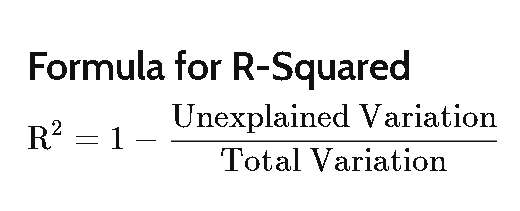

In [ ]:
from sklearn.metrics import r2_score
r2_DT = r2_score(y_test, pred)  
r2_DT

print(f"Precision = {r2_DT}")


didapatkan score 71% , sehingga dinyatakan bahwa variable dependen dengan variable independen itu berkolerasi tinggi

## Deployment


In [ ]:
import pickle
filename = 'laptop-prices.sav'
pickle.dump(lr,open(filename,'wb'))